# Sowing Success: How Machine Learning Helps Farmers Select the Best Crops

![Farmer in a field](farmer_in_a_field.jpg)

Measuring essential soil metrics such as nitrogen, phosphorous, potassium levels, and pH value is an important aspect of assessing soil condition. However, it can be an expensive and time-consuming process, which can cause farmers to prioritize which metrics to measure based on their budget constraints.

Farmers have various options when it comes to deciding which crop to plant each season. Their primary objective is to maximize the yield of their crops, taking into account different factors. One crucial factor that affects crop growth is the condition of the soil in the field, which can be assessed by measuring basic elements such as nitrogen and potassium levels. Each crop has an ideal soil condition that ensures optimal growth and maximum yield.

A farmer reached out to you as a machine learning expert for assistance in selecting the best crop for his field. They've provided you with a dataset called `soil_measures.csv`, which contains:

- `"N"`: Nitrogen content ratio in the soil
- `"P"`: Phosphorous content ratio in the soil
- `"K"`: Potassium content ratio in the soil
- `"pH"` value of the soil
- `"crop"`: categorical values that contain various crops (target variable).

Each row in this dataset represents various measures of the soil in a particular field. Based on these measurements, the crop specified in the `"crop"` column is the optimal choice for that field.  

In this project, you will build multi-class classification models to predict the type of `"crop"` and identify the single most importance feature for predictive performance.

In [2]:
# All required libraries are imported here for you.
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

# Load the dataset
crops = pd.read_csv("soil_measures.csv")

# Display the first few rows of the dataset for a quick overview
print("\nFirst few rows of the dataset:")
print(crops.head())


First few rows of the dataset:
    N   P   K        ph  crop
0  90  42  43  6.502985  rice
1  85  58  41  7.038096  rice
2  60  55  44  7.840207  rice
3  74  35  40  6.980401  rice
4  78  42  42  7.628473  rice


In [3]:
# Check for missing values
print("Missing values in the dataset:")
print(crops.isnull().sum())

# Display the total number of missing values
total_missing = crops.isnull().sum().sum()
print(f"\nTotal number of missing values: {total_missing}")

#  If there are no missing values, confirm this
if total_missing == 0:
    print("The dataset has no missing values.")
else:
    print("The dataset contains missing values. Further investigation may be needed.")

Missing values in the dataset:
N       0
P       0
K       0
ph      0
crop    0
dtype: int64

Total number of missing values: 0
The dataset has no missing values.



Unique crop types in the dataset:
['rice' 'maize' 'chickpea' 'kidneybeans' 'pigeonpeas' 'mothbeans'
 'mungbean' 'blackgram' 'lentil' 'pomegranate' 'banana' 'mango' 'grapes'
 'watermelon' 'muskmelon' 'apple' 'orange' 'papaya' 'coconut' 'cotton'
 'jute' 'coffee']

Count of each crop type:
crop
rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: count, dtype: int64

Percentage of each crop type:
crop
rice           4.545455
maize          4.545455
jute           4.545455
cotton         4.545455
coconut        4.545455
papaya         4.545455
orange         4.545455
apple          4.545455
muskmelon      4.545455
watermelon

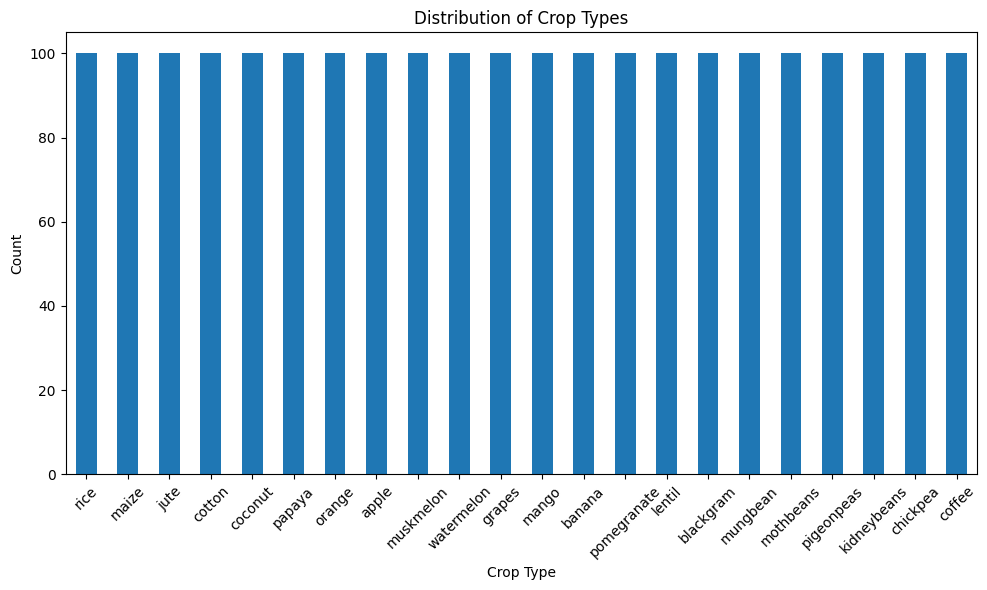

In [4]:
# Check for unique crop types
unique_crops = crops['crop'].unique()
print("\nUnique crop types in the dataset:")
print(unique_crops)

# Count the occurrences of each crop type
crop_counts = crops['crop'].value_counts()
print("\nCount of each crop type:")
print(crop_counts)

# Calculate the percentage of each crop type
crop_percentages = crops['crop'].value_counts(normalize=True) * 100
print("\nPercentage of each crop type:")
print(crop_percentages)

# Visualize the distribution of crop types
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
crops['crop'].value_counts().plot(kind='bar')
plt.title('Distribution of Crop Types')
plt.xlabel('Crop Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# crops.dtype

# Split the data

In [5]:
# Create training and test sets using all features
# Import necessary libraries
from sklearn.model_selection import train_test_split

# Separate features (X) and target variable (y)
X = crops.drop('crop', axis=1)
y = crops['crop']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the shapes of the resulting datasets
print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)
print("Training labels shape:", y_train.shape)
print("Testing labels shape:", y_test.shape)


Training set shape: (1760, 4)
Testing set shape: (440, 4)
Training labels shape: (1760,)
Testing labels shape: (440,)


# Evaluate feature performance

Individual Feature Performance:
N: 0.1455
P: 0.2068
K: 0.3227
ph: 0.1386


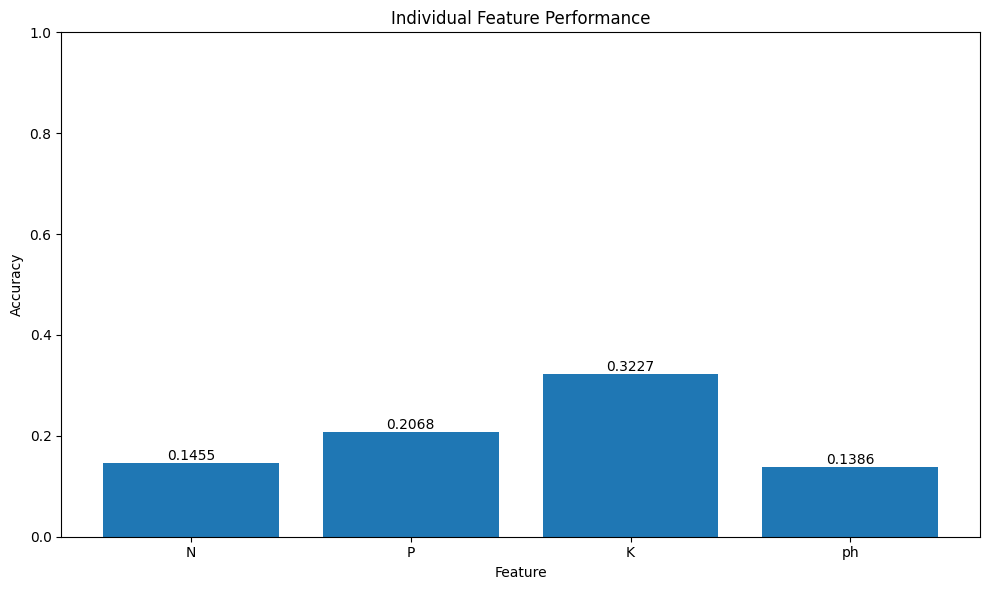

In [6]:
# Import necessary libraries
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# List of features
features = ['N', 'P', 'K', 'ph']

# Dictionary to store results
feature_performance = {}

# Evaluate each feature individually
for feature in features:
    # Create a Decision Tree classifier
    clf = DecisionTreeClassifier(random_state=42)
    
    # Train the model using only the current feature
    X_train_feature = X_train[[feature]]
    X_test_feature = X_test[[feature]]
    
    # Fit the model
    clf.fit(X_train_feature, y_train)
    
    # Make predictions
    y_pred = clf.predict(X_test_feature)
    
    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    
    # Store the result
    feature_performance[feature] = accuracy

# Print the results
print("Individual Feature Performance:")
for feature, accuracy in feature_performance.items():
    print(f"{feature}: {accuracy:.4f}")

# Visualize the results
plt.figure(figsize=(10, 6))
plt.bar(feature_performance.keys(), feature_performance.values())
plt.title('Individual Feature Performance')
plt.xlabel('Feature')
plt.ylabel('Accuracy')
plt.ylim(0, 1)  # Set y-axis limit from 0 to 1
for i, v in enumerate(feature_performance.values()):
    plt.text(i, v, f'{v:.4f}', ha='center', va='bottom')
plt.tight_layout()
plt.show()


# Create the best_predictive_feature variable

In [8]:
# Find the feature with the highest accuracy
best_feature = max(feature_performance, key=feature_performance.get)
best_score = feature_performance[best_feature]

# Create the best_predictive_feature dictionary
best_predictive_feature = {best_feature: best_score}

print(f"Best predictive feature: {best_feature}")
print(f"Best score: {best_score:.4f}")


Best predictive feature: K
Best score: 0.3227
